In [ ]:
#Import the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
#Read the file
xlsx = pd.ExcelFile('Dataset.xlsx')

#read the data from local directory
data = pd.read_excel(xlsx, 'Dataset')
Originaldataset=data


In [73]:
#create the column Timeliness to the original data set 
data['Timeliness']=data['Teacher.Response.Time']-data['Student.Message.Time']

#delete student message time and teacher response time
del data['Teacher.Response.Time']
del data['Student.Message.Time']


data=data[(data['School.Name'] != 'Office of the President RMITV')]
#View the resultant dataset
#data.head()

In [74]:
#check for missing data
data.isnull().sum()

# From the results its clear that 13664(20% of total) college names and corresponding school names are missing,So at the 
#college level data exploration, its better to get rid of these rows and proceed with the available school names.Missing 
#value replacement is not an ideal method in this scenario.

Student.ID          0
Teacher.ID          0
College.Name    13664
School.Name     13664
Timeliness          0
dtype: int64

In [75]:
# eliminating rows with missing data
data=data.dropna()

#check the shape of new dataset
data.shape #66009-13664

(52344, 5)

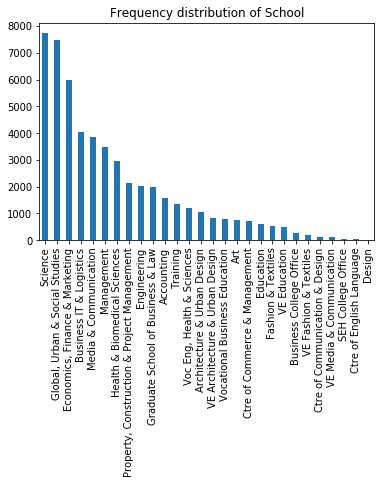

In [76]:
#FREQUENCY DISTRIBUTION OF SCHOOL
data['School.Name'].value_counts().plot.bar(title='Frequency distribution of School')

In [77]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = data.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

#call function to remove otliers
data_out=remove_outlier(data, 'Timeliness')

#view the shape
data_out.shape


(46213, 5)

In [78]:
#convert the TIMELINESS TO SECONDS

data_out['Timeliness_second']=data_out['Timeliness'].astype('timedelta64[s]')

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


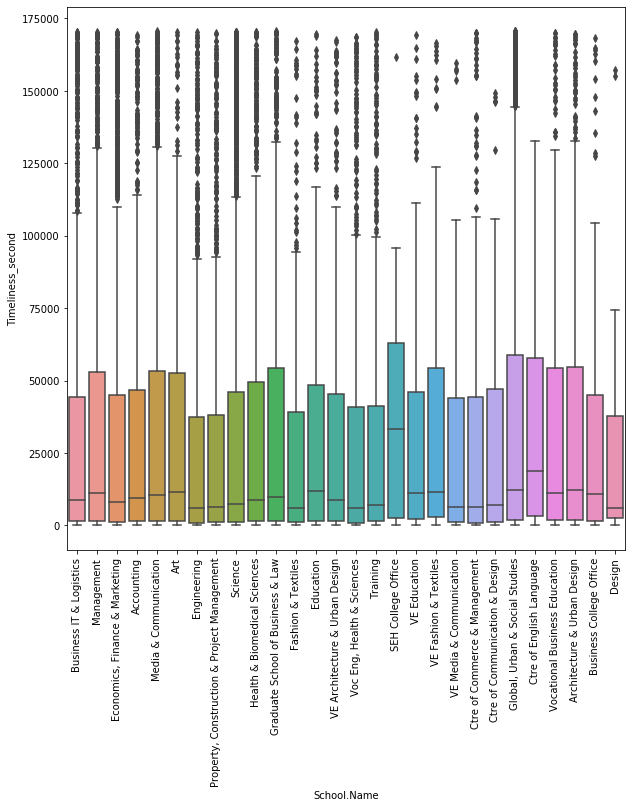

In [79]:
#box plot of Timeliness according to college
plt.figure(figsize=(10, 10))
p=sns.boxplot(x="School.Name", y="Timeliness_second", data=data_out)
plt.setp(p.get_xticklabels(),rotation=90)
plt.show()

#From the box plot its clear that the upper bound of all the graphs is around 50000 seconds


In [80]:
#Quantile statistics of Timeliness across different colleges

data_out.groupby("School.Name")["Timeliness_second"].describe().reset_index()

,School.Name,count,mean,std,min,25%,50%,75%,max
0,Accounting,1440.0,28903.089583,38436.073598,44.0,1470.25,9627.0,46776.75,169398.0
1,Architecture & Urban Design,807.0,32462.229244,40176.817954,41.0,1948.50,12252.0,54644.50,169654.0
2,Art,622.0,30947.786174,39371.049242,64.0,1496.50,11461.5,52604.25,170327.0
3,Business College Office,229.0,29389.441048,38764.795942,84.0,1417.00,10956.0,44955.00,168214.0
4,Business IT & Logistics,3722.0,26817.228103,35976.172644,8.0,1641.25,8763.5,44230.50,170322.0
5,Ctre of Commerce & Management,652.0,26741.555215,37616.593667,69.0,731.75,6448.0,44243.00,170112.0
6,Ctre of Communication & Design,106.0,27045.537736,37094.281228,106.0,1278.75,7077.5,47037.50,149445.0
7,Ctre of English Language,27.0,31795.814815,33877.382981,170.0,3292.00,18976.0,57924.50,132874.0
8,Design,23.0,29327.521739,45815.412048,139.0,2429.00,6123.0,37914.50,157298.0
9,"Economics, Finance & Marketing",5353.0,27786.816365,38123.665186,8.0,1174.00,7932.0,44998.00,170442.0


In [94]:
#Binning the timeliness
#Change timeliness into categorical variableTimelinessBin
cut_labels_6 = ['Within1hr','>1hr']
cut_bins = [0,3600,170577]
data_out['TimelinessBin'] = pd.cut(data_out['Timeliness_second'], bins=cut_bins, labels=cut_labels_6)

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<function matplotlib.pyplot.show(*args, **kw)>

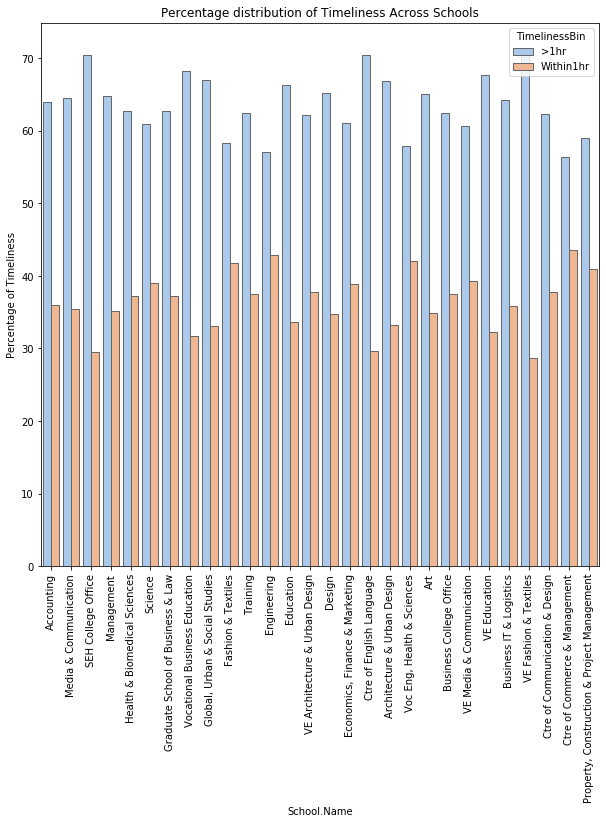

In [95]:
#Display percentage of timeliness across college
plt.figure(figsize=(10, 10))
timeliness_counts = (data_out.groupby(['School.Name'])['TimelinessBin']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('TimelinessBin'))



p = sns.barplot(x="School.Name", y="percentage", hue="TimelinessBin", data=timeliness_counts,palette="pastel", edgecolor=".4")
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
plt.title("Percentage distribution of Timeliness Across Schools")
plt.ylabel("Percentage of Timeliness")
plt.setp(p.get_xticklabels(), rotation=90)
plt.show

In [96]:
#Frequency Table
freq_df = data_out.groupby(['School.Name'])['TimelinessBin'].value_counts()
data_pcts = freq_df.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
freq_df=data_pcts.unstack()

In [97]:
data_pcts.unstack()

TimelinessBin,>1hr,Within1hr
School.Name,,
Accounting,64.027778,35.972222
Architecture & Urban Design,66.790582,33.209418
Art,65.112540,34.887460
Business College Office,62.445415,37.554585
Business IT & Logistics,64.212789,35.787211
Ctre of Commerce & Management,56.441718,43.558282
Ctre of Communication & Design,62.264151,37.735849
Ctre of English Language,70.370370,29.629630
Design,65.217391,34.782609


In [ ]:
#Schools Needs Improvement
VE Fashion & Textiles	71.337580	28.662420
SEH College Office	70.454545	29.545455
Ctre of English Language	70.370370	29.629630